<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main difference between Regression and Classification algorithms that Regression algorithms are used to predict the continuous values such as price, salary, age, etc. and Classification algorithms are used to predict/Classify the discrete values such as Male or Female, True or False, Spam or Not Spam, etc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor  
#decision tree regression algorithm
#since we have to find out a continuos numerical value we use XGBRegressor, in classification problem we use classifier

from sklearn import metrics
#this has the regression accuracy testing functions such as R-square and mean absolute


In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

house = pd.DataFrame(housing.data, columns = housing.feature_names) #putting the raw data in 2D-frame
house['price'] = pd.Series(housing.target)
#house.head()
house_price_dataframe = house

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
house_price_dataframe.shape

(20640, 9)

In [ ]:
#checking if our dataset has any missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [ ]:
#splitting the dataset into features and label
x = house_price_dataframe.drop(columns='price', axis=1) #features
y = house_price_dataframe['price']  #labels

In [ ]:
x.shape

(20640, 8)

In [ ]:
y.shape

(20640,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

#Model Training

*   XGBoost Regression



In [ ]:
#loading the model
model = XGBRegressor()

In [ ]:
#training the model with x_train
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#Evaluating the model

In regression model we use R-squared error, mean absolute error, etc

1.    Predicting the training data

In [ ]:
training_data_prediction = model.predict(x_train)  #this will store the price predicted by our trained ML model based on the training dataset itself which contains only the features

In [ ]:
# R-squared error, lesser the value, better our model in predicting
score_train_1 = metrics.r2_score(y_train, training_data_prediction)
score_train_1

0.9451221492760822

In [ ]:
# Mean-absolute error
score_train_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
score_train_2

0.1919170860794262

2.    Predicting the test data

In [ ]:
testing_data_prediction = model.predict(x_test)

In [ ]:
# R-squared error, lesser the value, better our model in predicting
score_test_1 = metrics.r2_score(y_test, testing_data_prediction)
score_test_1

0.8412904408180302

In [ ]:
# Mean-absolute error
score_test_2 = metrics.mean_absolute_error(y_test, testing_data_prediction)
score_test_2

0.30753655785801337

#Visualizing the actual prices and predicted prices

Text(0, 0.5, 'predicted prices')

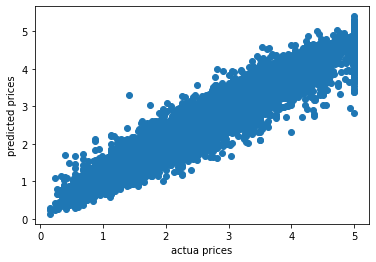

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("actua prices")
plt.ylabel("predicted prices")
#we should get an ideal straight line (slope=1) with points closest to each other

Text(0, 0.5, 'predicted prices')

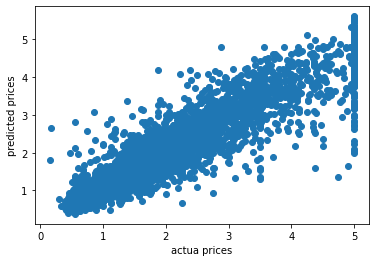

In [ ]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("actua prices")
plt.ylabel("predicted prices")

#Making a prediction system

In [ ]:
input_data = (8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23)
#price of house in california with above features is 4.526

input_data_as_nparray = np.array(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_nparray.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

In [ ]:
print(prediction)

[4.353996]
